This notebook demonstrates some sample results of the CelebA smile classifier on the FFHQ dataset.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from src.classification.smile_classifier import SmileClassifier

In [2]:
# Configuration
PRETRAINED_CLASSIFIER_PATH = "../models/classifier/celeba_smile/predictor_128.pth.tar"
SCALED_CLASSIFIER_PATH = "../models/classifier/celeba_smile/predictor_128_scaled3.pth.tar"
ATTR_FILE = "../models/classifier/celeba_smile/attributes.json"
IMAGE_TENSOR__PATH = "../data/ffhq/pt_images/"
IMAGE_PATH = "../data/ffhq/images1024x1024/"

In [ ]:
# Scaled classifier
smile_classifier = SmileClassifier(PRETRAINED_CLASSIFIER_PATH, ATTR_FILE, SCALED_CLASSIFIER_PATH, device="cpu", log_level="ERROR")

Initialized model with pretrained weights from https://download.pytorch.org/models/resnet50-19c8e357.pth
Initialized model with pretrained weights from https://download.pytorch.org/models/resnet50-19c8e357.pth


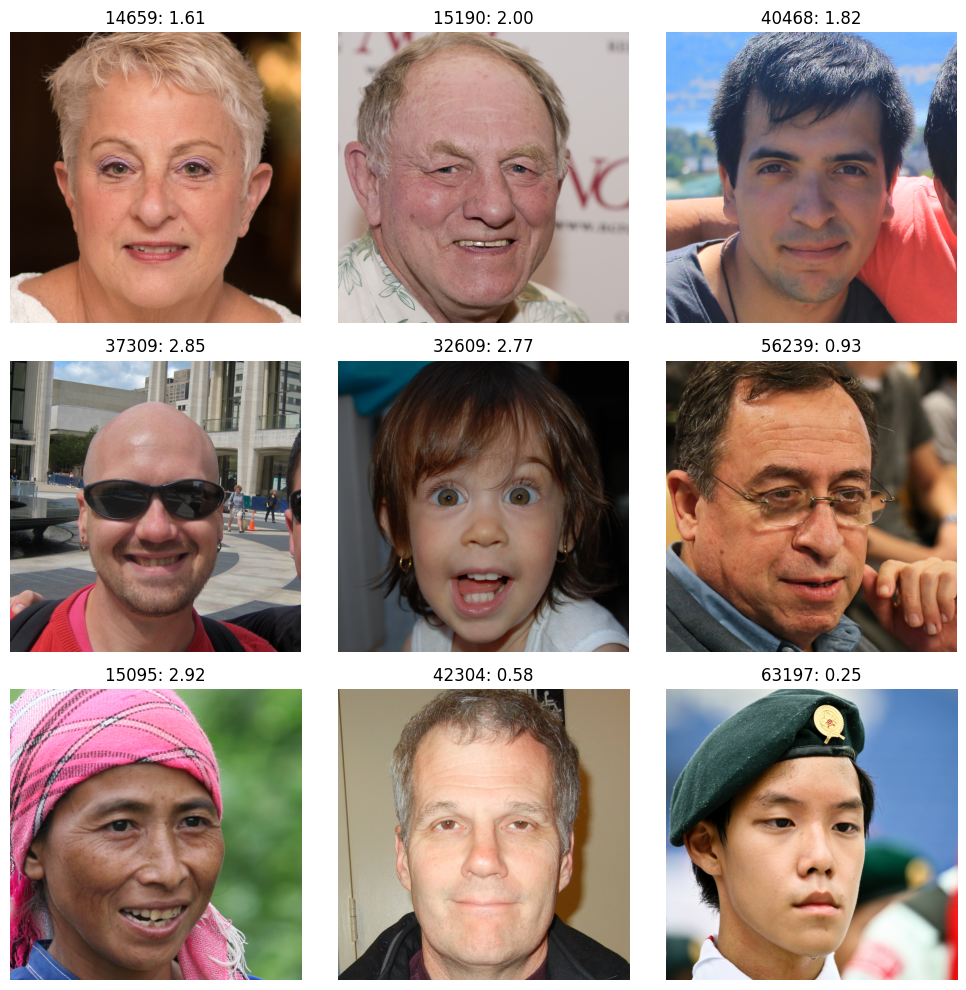

In [7]:
# Demo: Classify 9 random images and plot them in a 3x3 grid with their smile score
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        # Randomly select an image
        random_image = np.random.choice(os.listdir(IMAGE_TENSOR__PATH)).split(".")[0]
        image_tensor_path = IMAGE_TENSOR__PATH + random_image + ".pt"
        image_path = IMAGE_PATH + random_image + ".png"

        # Classify the image
        smile_score = smile_classifier.classify(image_tensor_path)

        # Load and display the image
        image = plt.imread(image_path)
        axs[i, j].imshow(image)
        axs[i, j].set_title(f"{random_image}: {smile_score:.2f}")
        axs[i, j].axis("off")

plt.tight_layout()
plt.show()